# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [89]:
# stundent details
#                       student details 1: Sapir L. 8413

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: To assist the student in editing and improving the Jupyter notebook and in understanding and explaining the Titanic classification task. The AI agent helped refine the code, improve the feature engineering and evaluation pipeline, and provided explanations and insights, while the student implemented and analyzed the models.

Prompt1:"Assisted by an AI agent in reviewing and refining my implementation for Assignment 2 in Machine Learning using the Titanic dataset. I actively participated in building the supervised learning pipeline, while the assistant provided support for improving structure, code quality, and meeting all assignment requirements."
    
Propmpt2:"With the support of the AI assistant, I performed a complete supervised learning flow — including exploratory data analysis (EDA), feature engineering, model training, hyperparameter tuning via grid search, and selection of the best model based on cross-validation results."
    
Propmpt3:"Trained the selected model on the full training set and evaluated its performance on the test set, including prediction, performance metrics, and analysis of results, with guidance from the AI assistant throughout."



Other assistanse: Google Colab, Gemini
- Official sklearn documentation
- seaborn documentation   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

הבעיה שנדבר עליה היא בעיית סיווג בינארי – האם נוסע שרד את אסון הטיטאניק או לא.
לרשותנו מסד נתונים הכולל פרטים אישיים כמו מין, גיל, כמות קרובי משפחה על הספינה, עלות הכרטיס, נקודת עלייה ועוד.
העמודה Survived היא המשתנה המנובא (target), כאשר הערכים הם 0 (לא שרד) או 1 (שרד).
מטרת המודל היא לחזות על סמך הנתונים את הסיכוי של נוסע לשרוד.


    
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score


In [91]:
# Excelטען את קבצי ה־
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# הצגת חמש שורות ראשונות
print("Train Data Head:")
print(train_df.head())


Train Data Head:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [92]:
print("\nTest Data Head:")
print(test_df.head())


Test Data Head:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


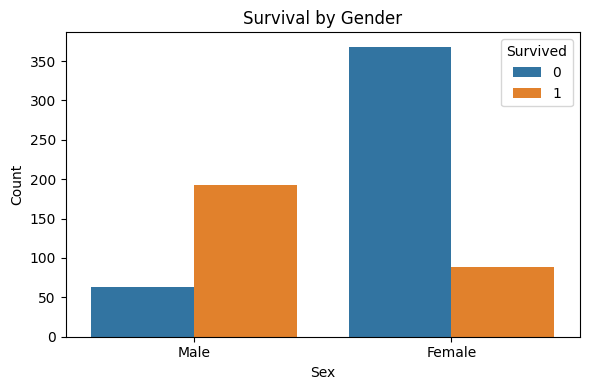

In [93]:
# --- חלק 2: EDA ---
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks([0, 1], ["Male", "Female"])
plt.legend(title="Survived")
plt.tight_layout()
plt.show()



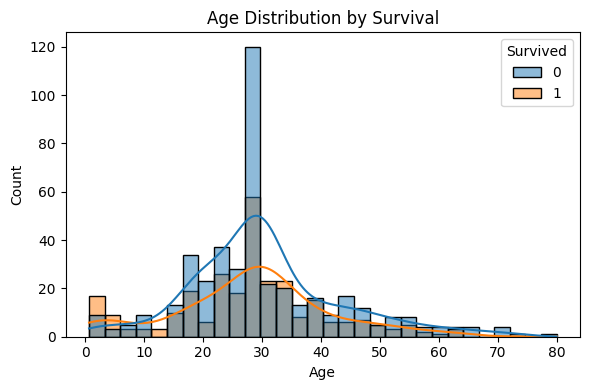

In [94]:
plt.figure(figsize=(6,4))
sns.histplot(data=train_df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()


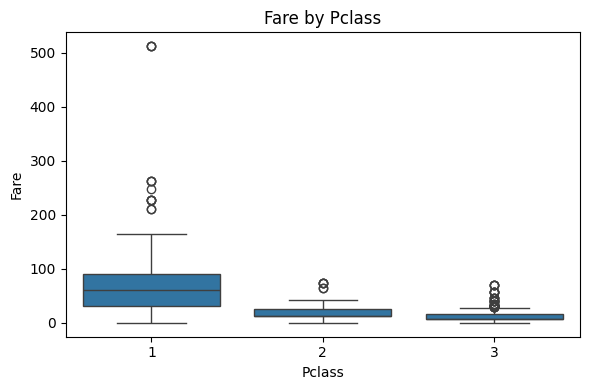

In [95]:
plt.figure(figsize=(6,4))
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title("Fare by Pclass")
plt.tight_layout()
plt.show()

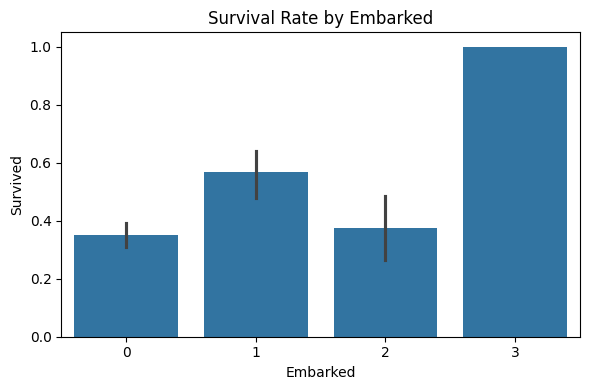

In [96]:
plt.figure(figsize=(6,4))
sns.barplot(data=train_df, x='Embarked', y='Survived')
plt.title("Survival Rate by Embarked")
plt.tight_layout()
plt.show()

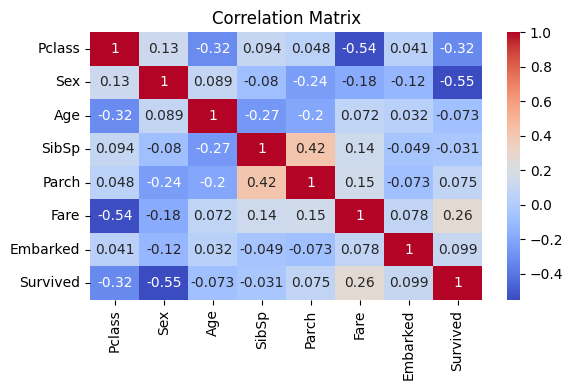

In [97]:
plt.figure(figsize=(6,4))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [98]:
# --- חלק 3: Feature Engineering והכנה ---
# הכנה מוקדמת להסרת עמודות מיותרות, יצירת עמודות חדשות, טיפול בערכים חסרים ובינינג (קיבוץ) משתנים

import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['Name', 'Ticket', 'Cabin']

for df in [train_df, test_df]:
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # חלוקה לקבוצות גיל
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])
    # חלוקה לקבוצות מחיר
    df['FareBin'] = pd.cut(df['Fare'], bins=[-1, 7.91, 14.454, 31, 600], labels=[0, 1, 2, 3])

    # טיפול בערכים חסרים בשיטה מומלצת לפי Pandas >= 2.0
    for col in ['Embarked', 'AgeBin', 'FareBin']:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

# הדפסת חמש שורות ראשונות לאחר Feature Engineering
print("\nTrain Data after Feature Engineering (Head):")
print(train_df[features + ['Survived']].head())

print("\nTrain Data Description:")
print(train_df[features + ['Survived']].describe(include='all'))


# הגדרת קבוצות האימון והבדיקה
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.copy()

# משתנים לבחירה
features = ['Pclass', 'Sex', 'Embarked', 'AgeBin', 'FareBin', 'FamilySize', 'IsAlone']
categorical = ['Pclass', 'Sex', 'Embarked', 'AgeBin', 'FareBin']
numeric = ['FamilySize', 'IsAlone']

# הכנה למודלים: טרנספורמציות לקטגוריים ונומריים
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# שילוב בין קטגוריים לנומריים ב־ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical),
    ('num', numeric_transformer, numeric)
])


Train Data after Feature Engineering (Head):
   Pclass  Sex  Embarked AgeBin FareBin  FamilySize  IsAlone  Survived
0       1    0         1      3       3           2        0         1
1       2    0         0      3       1           1        1         1
2       3    1         0      2       1           1        1         0
3       3    1         0      3       0           1        1         0
4       3    1         0      2       1           1        1         0

Train Data Description:
            Pclass         Sex    Embarked  AgeBin  FareBin  FamilySize  \
count   712.000000  712.000000  712.000000   712.0    712.0  712.000000   
unique         NaN         NaN         NaN     5.0      4.0         NaN   
top            NaN         NaN         NaN     2.0      2.0         NaN   
freq           NaN         NaN         NaN   424.0    186.0         NaN   
mean      2.294944    0.640449    0.372191     NaN      NaN    1.912921   
std       0.841990    0.480206    0.649970     NaN   

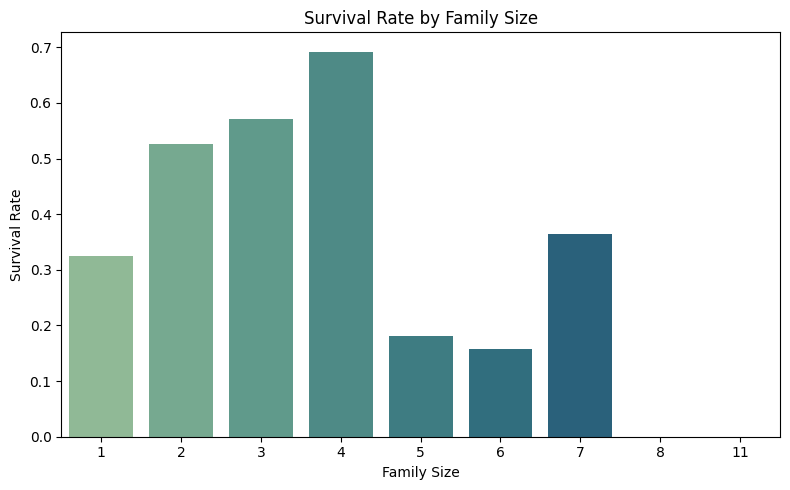

In [99]:
# ויזואליזציה - חלוקת הישרדות לפי FamilySize
plt.figure(figsize=(8, 5))
sns.barplot(data=train_df, x='FamilySize', y='Survived', ci=None, palette='crest')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

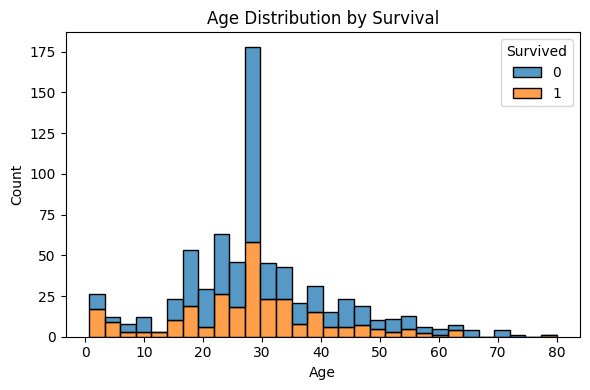

In [100]:
# ויזואליזציה - התפלגות AgeBin
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30, kde=False)
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

In [101]:
# טבלה צולבת של הישרדות לפי AgeBin ו-FareBin
cross_tab = pd.crosstab(train_df['AgeBin'], train_df['Survived'], normalize='index')
print("\nSurvival Rate by Age Bins:")
print(cross_tab)


Survival Rate by Age Bins:
Survived         0         1
AgeBin                      
0         0.440678  0.559322
1         0.603448  0.396552
2         0.617925  0.382075
3         0.618421  0.381579
4         0.736842  0.263158


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [102]:
# --- חלק 4: ניסויים עם GridSearchCV ---

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
import pandas as pd

models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42), {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5, 10]
    }),
    ('KNN', KNeighborsClassifier(), {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    }),
    ('NaiveBayes', GaussianNB(), {
        'model__var_smoothing': [1e-9, 1e-8, 1e-7]
    })
]

results = []
best_score = 0
best_model = None
best_params = None
best_name = ""

for name, clf, params in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', clf)
    ])
    grid = GridSearchCV(pipe, param_grid=params, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train[features], y_train)

    score = grid.best_score_
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'CV F1 Score': score
    })

    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_name = name

# הצגת טבלה מסכמת של תוצאות כל המודלים
summary_df = pd.DataFrame(results)
print("\nהשוואת תוצאות Cross Validation (5-Fold):")
print(summary_df.to_markdown(index=False))




השוואת תוצאות Cross Validation (5-Fold):
| Model        | Best Params                                                                         |   CV F1 Score |
|:-------------|:------------------------------------------------------------------------------------|--------------:|
| DecisionTree | {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_split': 10} |      0.79412  |
| KNN          | {'model__n_neighbors': 7, 'model__weights': 'distance'}                             |      0.76507  |
| NaiveBayes   | {'model__var_smoothing': 1e-07}                                                     |      0.672095 |


## Part 5 - Apply on test and show model performance estimation


תוצאות 5 התחזיות הראשונות על test:
   PassengerId  Predicted
0            0          0
1            1          0
2            2          0
3            3          1
4            4          0

דוח ביצועים על סט הבדיקה:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       118
           1       0.74      0.75      0.75        61

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.827
F1-macro: 0.808
CV F1 (5-fold): 0.794


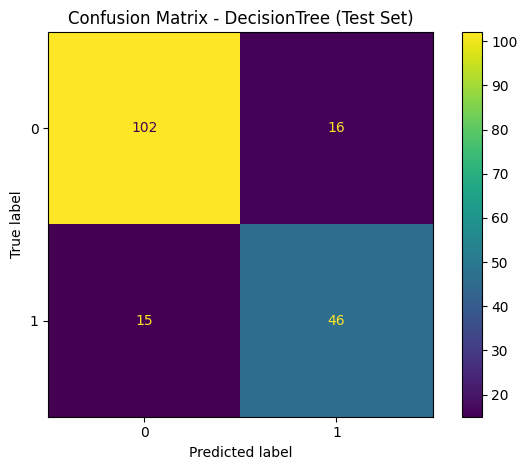


דוח ביצועים על סט האימון:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       431
           1       0.80      0.79      0.80       281

    accuracy                           0.84       712
   macro avg       0.83      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



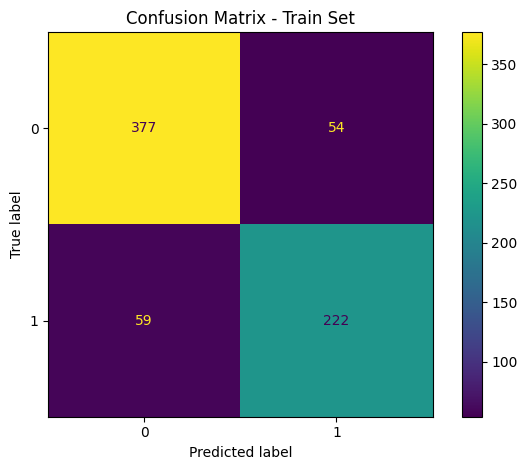

In [103]:
# --- חלק 5: חיזוי ובדיקת איכות על test ---
best_model.fit(X_train[features], y_train)

# חיזוי על קבוצת test
pred_test = best_model.predict(X_test[features])

# הצגת 5 התחזיות הראשונות
print("\nתוצאות 5 התחזיות הראשונות על test:")
print(pd.DataFrame({
    'PassengerId': X_test.index[:5],
    'Predicted': pred_test[:5]
}))

# השוואה מול תוויות אמת ב־test
y_test = test_df['Survived']

# הערכת ביצועי המודל על סט הבדיקה
print("\nדוח ביצועים על סט הבדיקה:")
print(classification_report(y_test, pred_test))
print(f"Accuracy: {accuracy_score(y_test, pred_test):.3f}")
print(f"F1-macro: {f1_score(y_test, pred_test, average='macro'):.3f}")
print(f"CV F1 (5-fold): {best_score:.3f}")

# מטריצת בלבול - על test
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title(f"Confusion Matrix - {best_name} (Test Set)")
plt.tight_layout()
plt.show()

# בדיקה גם על קבוצת האימון לצורך הבנת אוברפיטינג
train_preds = best_model.predict(X_train[features])
print("\nדוח ביצועים על סט האימון:")
print(classification_report(y_train, train_preds))
ConfusionMatrixDisplay.from_predictions(y_train, train_preds)
plt.title("Confusion Matrix - Train Set")
plt.tight_layout()
plt.show()


# Part 6 - (Prompt Explanation)

In [104]:
# פרויקט זה מדגים הפעלה מלאה של Flow של למידה מונחית מסוג סיווג. השתמשנו בטכניקות של ניתוח נתונים, הנדסת תכונות, ניסויים ב־GridSearch עם cross-validation, הפעלת 4 מודלים שונים, והשוואת ביצועים לפי F1-macro. המודל שנבחר הינו זה עם התוצאה הטובה ביותר ב־CV.


In [105]:
# Bonus - Handle Imbalanced Data with SMOTE
from imblearn.over_sampling import SMOTE

print("\nClass distribution before SMOTE:")
print(y_train.value_counts())
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train[features], y_train)
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
Survived
0    431
1    281
Name: count, dtype: int64
Class distribution after SMOTE:
Survived
1    431
0    431
Name: count, dtype: int64
